<a href="https://colab.research.google.com/github/niloofardadras/Shap-Package-Issue/blob/master/Tensorflow_XGBoost_StepByStep_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framing the Problem

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damagec

2 represents a medium amount of damagec

3 represents almost complete destruction

This data source and problem was taken from the website: https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

# Getting the Data

 This data uses the train and test combined data file. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns # Statistical visualisations
from math import pi # Radar chart support
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix 

In [ ]:
file_path = "/content/drive/MyDrive/Modeling Earthquake Damage/" 
AllData='All_Data_WithMissingValues.csv'
Allvalues=pd.read_csv(file_path+AllData, index_col='building_id') #import data


## Changing damage grade labels to start from 0 for passing to ML pipeline
Allvalues['damage_grade']=Allvalues['damage_grade'].apply(lambda x: 0 if x==1 else (1 if x==2 else 2))

# Taking a Quick Look at the Data Structure

In [ ]:
Allvalues.shape

(347469, 39)

In [ ]:
Allvalues.columns.values.tolist()

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [ ]:
Allvalues.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,1
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,1
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
#### Exploring data for missing values



In [ ]:
Allvalues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 802906 to 501372
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          347469 non-null  int64  
 1   geo_level_2_id                          347469 non-null  int64  
 2   geo_level_3_id                          347469 non-null  int64  
 3   count_floors_pre_eq                     347469 non-null  int64  
 4   age                                     347469 non-null  int64  
 5   area_percentage                         347469 non-null  int64  
 6   height_percentage                       347469 non-null  int64  
 7   land_surface_condition                  330096 non-null  object 
 8   foundation_type                         347469 non-null  object 
 9   roof_type                               347469 non-null  object 
 10  ground_floor_type                      

In [ ]:
Allvalues.isnull().sum()

geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                    17373
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

There are three features with missing values : land_surface_condition, legal_ownership_status and count_families.

In [ ]:
## Looking into Labels

In [ ]:
Allvalues.damage_grade.unique()

array([2, 1, 0])

In [ ]:
Allvalues.damage_grade.value_counts()

1    148259
0    111992
2     87218
Name: damage_grade, dtype: int64

Text(0, 0.5, 'Count')

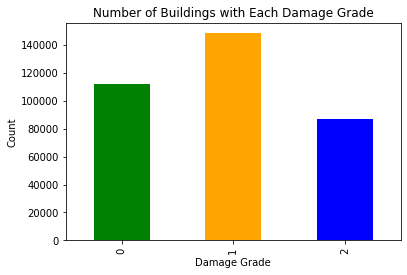

In [ ]:
(Allvalues.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade",color=['green', 'orange','blue', ]))
plt.xlabel('Damage Grade')
plt.ylabel('Count')

In [ ]:
## Looking into statistics and outliers

In [ ]:
Allvalues.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,...,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000
mean,13.897315,701.838052,6258.846760,2.130579,26.538814,8.017014,5.434799,0.088972,0.762077,0.034366,...,0.033686,0.008136,0.000958,0.000363,0.001053,0.000167,0.000138,0.000078,0.005065,0.928702
std,8.032597,412.875674,3646.950564,0.727761,73.527749,4.388646,1.915555,0.284704,0.425813,0.182167,...,0.180421,0.089832,0.030943,0.019039,0.032438,0.012919,0.011753,0.008815,0.070990,0.753814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,706.000000,6271.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,21.000000,1050.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


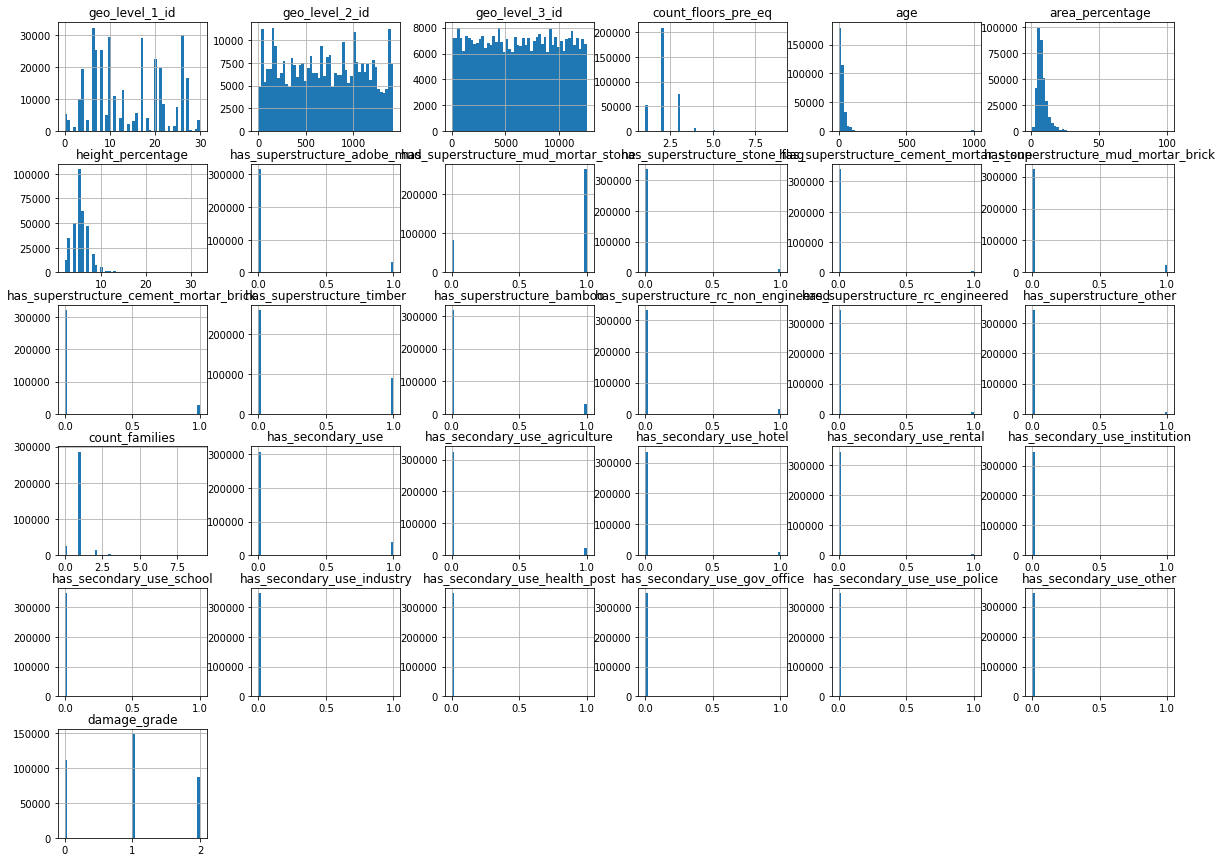

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Allvalues.hist(bins=50, figsize=(20,15))
plt.title('Feature Histograms')

plt.show()

There seems to be outliers for the age and area_percentage features.

# Discovering and Visualizing the Data to Gain Insights

In [ ]:
#Chacking if building age may have outliers
Allvalues[Allvalues['age'] >= 200].age.value_counts()

995    1851
200     140
Name: age, dtype: int64

In [ ]:
## looking more into Data and Statistics

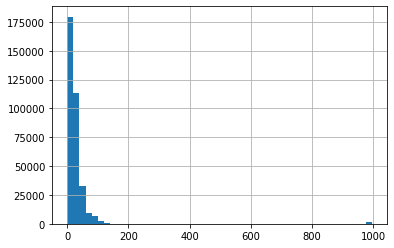

In [ ]:
Allvalues.age.hist(bins=50)

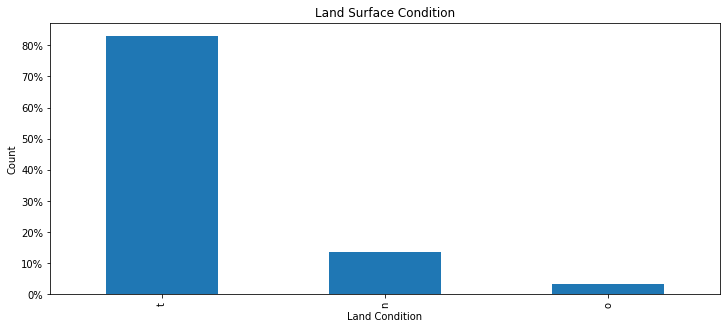

In [ ]:
# land surface condition distribution plot
plt.figure(figsize=(12,5))
ax = Allvalues.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()

In [ ]:
Allvalues.columns.values.tolist()

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [ ]:

#  'has_superstructure_cement_mortar_stone','has_superstructure_rc_engineered','has_superstructure_other',
#'has_secondary_use_rental',
#  'has_secondary_use_institution',
#  'has_secondary_use_school',
#  'has_secondary_use_industry',
#  'has_secondary_use_health_post',
#  'has_secondary_use_gov_office',
#  'has_secondary_use_use_police',
#  'has_secondary_use_other'
#  there is too much imbalance between the binary values for these so we can eliminate them for out ML training

##  'age', 'area_percentage' seem to be exponentialy skewed and would need power scaling

## count_floors_per_eq, count_families are categoric and will be engineered ( count_floors_per_eq will reduce dimention by creating value>=5 and   count_families will reduce dimention by creating value>=3 )

In [ ]:
### count_floors_per_eq seems like a categoric data along with other binary feaures

In [ ]:
Allvalues['count_floors_pre_eq'].value_counts()

2    209029
3     74171
1     53705
4      7186
5      3039
6       283
7        52
8         3
9         1
Name: count_floors_pre_eq, dtype: int64

In [ ]:
Allvalues['count_families'].value_counts()

1.0    286225
0.0     26501
2.0     14235
3.0      2285
4.0       521
5.0       127
6.0        31
7.0         7
9.0         3
8.0         2
Name: count_families, dtype: int64

In [ ]:
# Allvalues2=Allvalues
# Allvalues2['count_families'].fillna(Allvalues2['count_families'].mode()[0], inplace=True)
# Allvalues2['count_families'].value_counts()

In [ ]:
Allvalues['height_percentage'].value_counts()

5     104869
6      61837
4      50427
7      47360
3      34535
8      18460
2      12348
9       7146
10      5934
12      1246
11      1242
13      1036
15       399
16       246
18        95
32        90
14        85
20        41
21        21
23        12
17        11
19         8
24         6
25         4
26         3
22         3
28         2
31         2
29         1
Name: height_percentage, dtype: int64

In [ ]:
Allvalues['has_secondary_use_industry'].value_counts()

0    347103
1       366
Name: has_secondary_use_industry, dtype: int64

In [ ]:
Allvalues['has_secondary_use_hotel'].value_counts()

0    335764
1     11705
Name: has_secondary_use_hotel, dtype: int64

In [ ]:
#'has_secondary_use','has_secondary_use_agriculture' 'has_secondary_use_rental','has_superstructure_stone_flag',
#  'has_superstructure_cement_mortar_stone','has_superstructure_rc_engineered','has_superstructure_other',

In [ ]:
Allvalues['has_superstructure_cement_mortar_stone'].value_counts()

0    341104
1      6365
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [ ]:
Allvalues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 802906 to 501372
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          347469 non-null  int64  
 1   geo_level_2_id                          347469 non-null  int64  
 2   geo_level_3_id                          347469 non-null  int64  
 3   count_floors_pre_eq                     347469 non-null  int64  
 4   age                                     347469 non-null  int64  
 5   area_percentage                         347469 non-null  int64  
 6   height_percentage                       347469 non-null  int64  
 7   land_surface_condition                  330096 non-null  object 
 8   foundation_type                         347469 non-null  object 
 9   roof_type                               347469 non-null  object 
 10  ground_floor_type                      

## Looking for Correlations

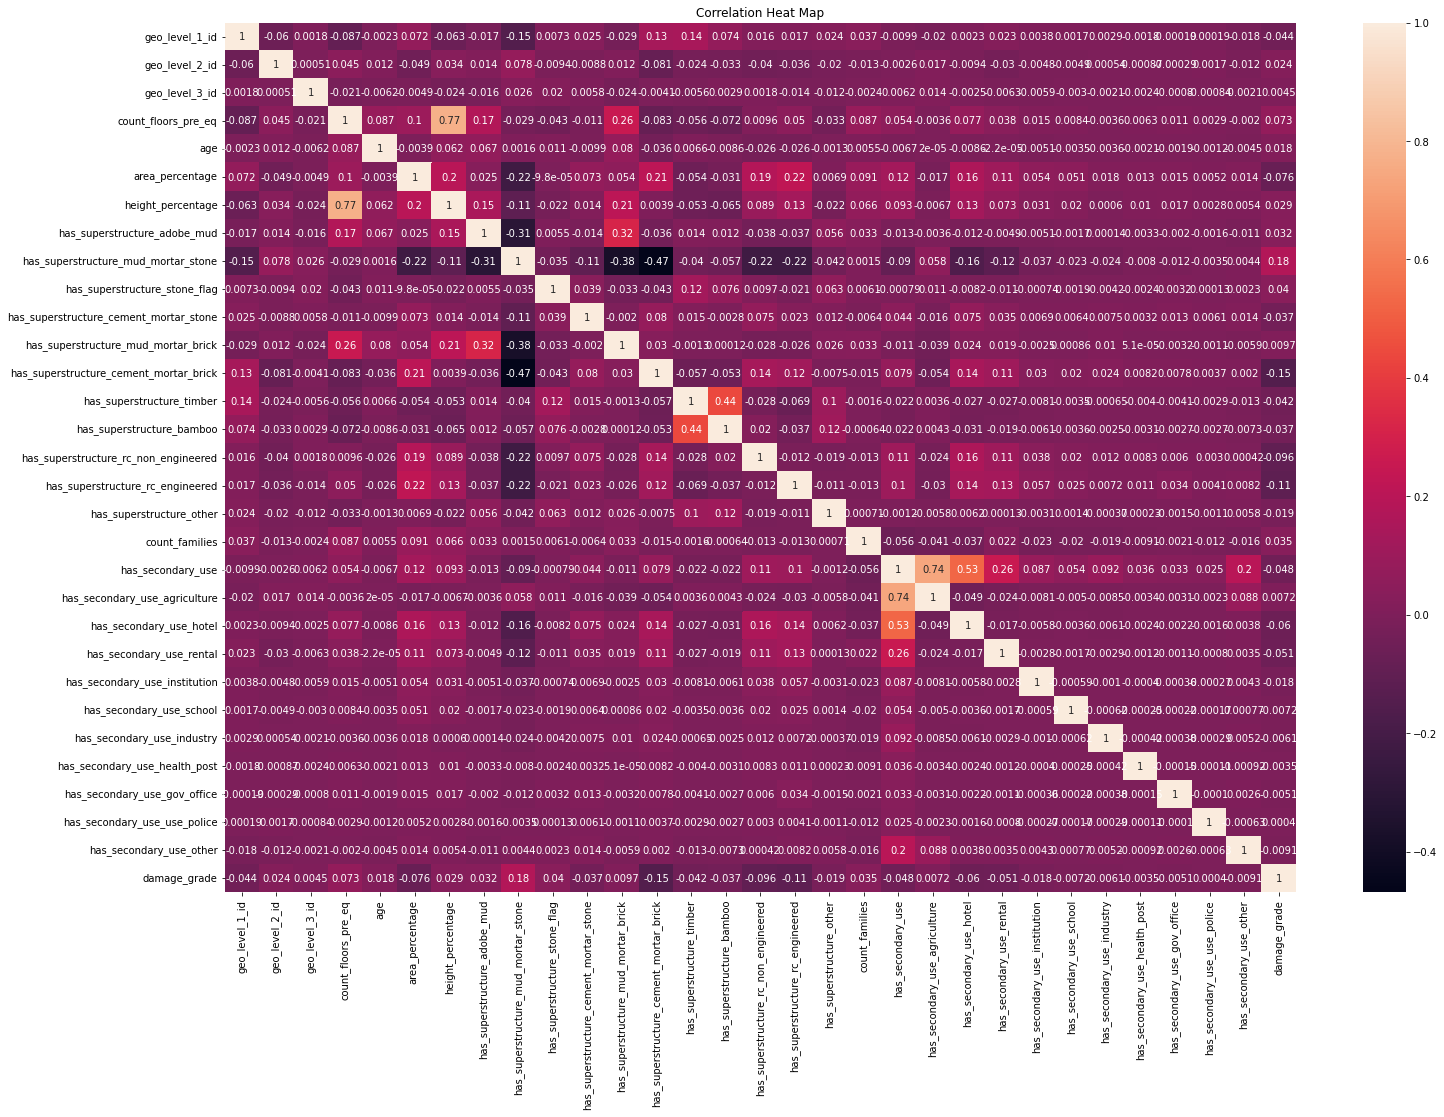

In [ ]:
# Looking for correlation between all features and between features and damage_grade

plt.figure(figsize=(24,16))
df_corr=Allvalues.corr()
plt.title('Correlation Heat Map')
sns.heatmap(df_corr, annot=True)

count_floors_pre_eq and height_percentage are strongly correlated (0.78)

has_secondary_use_agriculture and has_secondary_use are also strongly correlated (0.74)

In [ ]:
# Correlations between features and damage_grade
corr_all_train_values=Allvalues.corr()
corr_all_train_values["damage_grade"].sort_values(ascending=False)

damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.176961
count_floors_pre_eq                       0.072993
has_superstructure_stone_flag             0.039954
count_families                            0.034863
has_superstructure_adobe_mud              0.032200
height_percentage                         0.029063
geo_level_2_id                            0.023984
age                                       0.017765
has_superstructure_mud_mortar_brick       0.009725
has_secondary_use_agriculture             0.007240
geo_level_3_id                            0.004500
has_secondary_use_use_police              0.000401
has_secondary_use_health_post            -0.003506
has_secondary_use_gov_office             -0.005060
has_secondary_use_industry               -0.006109
has_secondary_use_school                 -0.007222
has_secondary_use_other                  -0.009063
has_secondary_use_institution            -0.018046
has_superstructure_other       

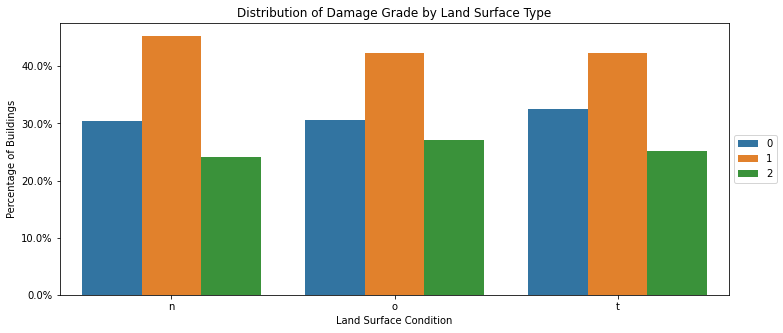

In [ ]:
# Calculate counts
df_temp = Allvalues.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['land_surface_condition', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'land_surface_condition', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")
plt.show()

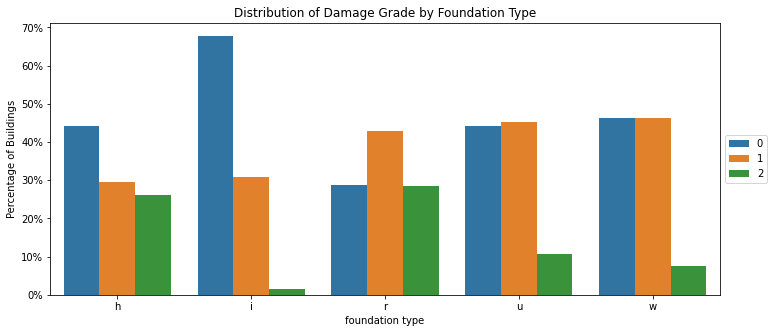

In [ ]:
# Calculate counts
df_temp = Allvalues.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['foundation_type', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'foundation_type', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("foundation type")
plt.ylabel("Percentage of Buildings")
plt.show()

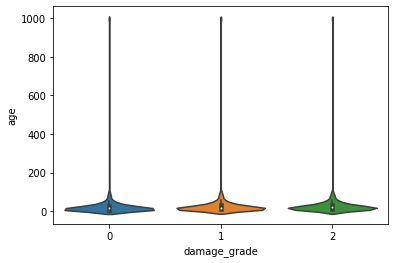

In [ ]:
#building with more age tends tobe impacted more
sns.violinplot(x="damage_grade",y="age",data=Allvalues)
plt.show()

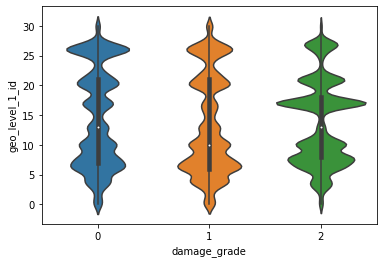

In [ ]:
sns.violinplot(x="damage_grade",y="geo_level_1_id",data=Allvalues)
plt.show()

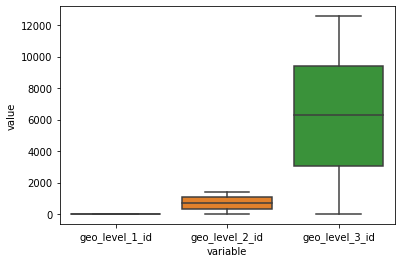

In [ ]:
import seaborn as sns

df = pd.DataFrame(data = Allvalues, columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

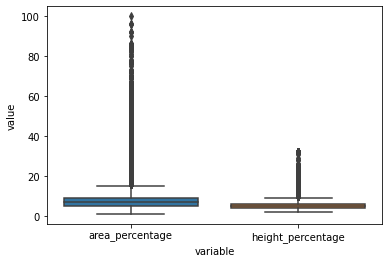

In [ ]:
#area and height_percentage have probable outlier
import seaborn as sns

df = pd.DataFrame(data = Allvalues, columns = ['area_percentage', 'height_percentage'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

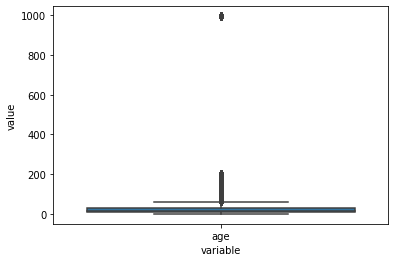

In [ ]:
# age feature has probable outlier
import seaborn as sns

df = pd.DataFrame(data = Allvalues, columns = ['age'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

# Creating a test set

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
## since we have multiple labels we use stratified sampling we will have 
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(Allvalues, test_size=0.2, random_state=42)

from sklearn.model_selection import StratifiedShuffleSplit

# we are setting 15% test set to be used after out model candidates were selected
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index1, test_valid_index in split.split(Allvalues, Allvalues.damage_grade):
    Allvalues_New = Allvalues.iloc[train_index1]
    test_Holdout_set = Allvalues.iloc[test_valid_index]

# we are setting 20% Validation set to be used for selecting model candiate
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split2.split(Allvalues_New, Allvalues_New.damage_grade):
    train_set = Allvalues_New.iloc[train_index]
    Validation_set = Allvalues_New.iloc[valid_index]




In [ ]:
len(test_Holdout_set)

34747

In [ ]:
len(train_set)

250177

In [ ]:
len(Validation_set)

62545

In [ ]:
train_set.isnull().sum()

geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                    12642
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

# Preparing the Data for Machine Learning Algorithms

## Data Cleaning ; removal of outliers

In [ ]:
train_set.shape
train_set.isnull().sum()

geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                    12642
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

### Age outliers

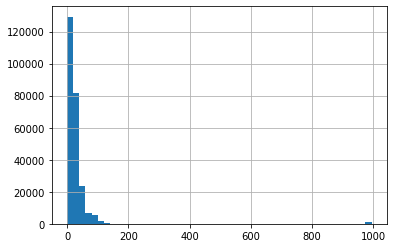

In [ ]:
train_set.age.hist(bins=50)

In [ ]:
# Removing outliers based on zscore values 
import scipy
zscore = scipy.stats.zscore(train_set['age'])

train_set['age'] = train_set['age'].mask(zscore.abs() >= 3)
train_set['age'] = train_set['age'].ffill().add(train_set['age'].bfill()).div(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


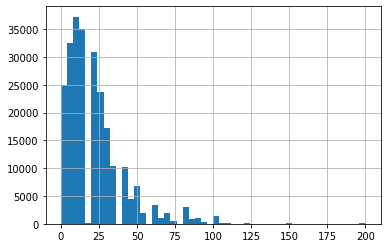

In [ ]:
train_set.age.hist(bins=50)

The age outliers have been replaced by a value of 90.

### area_percentage outliers

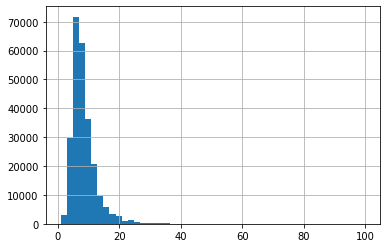

In [ ]:
train_set.area_percentage.hist(bins=50)

Thea area_percentage values are skewed to the right. 

In [ ]:
import scipy
zscore = scipy.stats.zscore(train_set['area_percentage'])

train_set['area_percentage'] = train_set['area_percentage'].mask(zscore.abs() >= 3)
train_set['area_percentage'] = train_set['area_percentage'].ffill().add(train_set['area_percentage'].bfill()).div(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


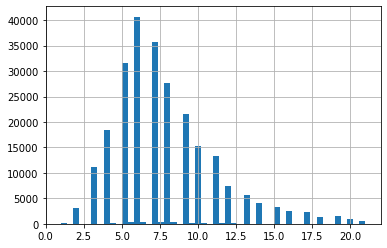

In [ ]:
train_set.area_percentage.hist(bins=50)

### height_percentage outliers

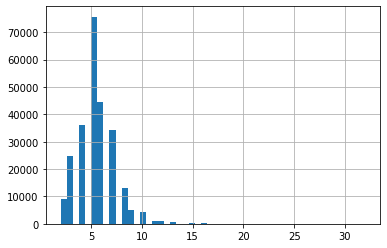

In [ ]:
train_set.height_percentage.hist(bins=50)

In [ ]:
# Removing outliers based on zscore values 
import scipy
zscore = scipy.stats.zscore(train_set['height_percentage'])

train_set['height_percentage'] = train_set['height_percentage'].mask(zscore.abs() >= 3)
train_set['height_percentage'] = train_set['height_percentage'].ffill().add(train_set['height_percentage'].bfill()).div(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


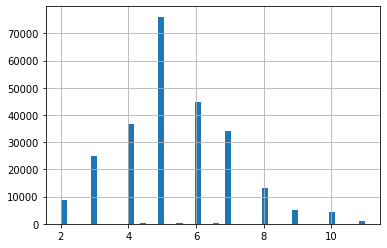

In [ ]:
train_set.height_percentage.hist(bins=50)

In [ ]:
train_set.isnull().sum()

geo_level_1_id                                0
geo_level_2_id                                0
geo_level_3_id                                0
count_floors_pre_eq                           0
age                                           0
area_percentage                               0
height_percentage                             0
land_surface_condition                    12642
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber               

## Transformation Pipelines




In [ ]:
#  'has_superstructure_cement_mortar_stone','has_superstructure_rc_engineered','has_superstructure_other',
#'has_secondary_use_rental',
#  'has_secondary_use_institution',
#  'has_secondary_use_school',
#  'has_secondary_use_industry',
#  'has_secondary_use_health_post',
#  'has_secondary_use_gov_office',
#  'has_secondary_use_use_police',
#  'has_secondary_use_other'
#  there is too much imbalance between the binary values for these so we can eliminate them for out ML training

##  Expoential_Attr['age', 'area_percentage'] seem to be exponentialy skewed and would need power scaling

## count_floors_per_eq, count_families are categoric and will be engineered ( count_floors_per_eq will reduce dimention by creating value>=5 and   count_families will reduce dimention by creating value>=3 )

Let's build a pipeline for preprocessing the numerical attributes: 

In [ ]:
Binary_columns=[ 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
  'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

DropColumns=[
              'has_superstructure_cement_mortar_stone','has_superstructure_rc_engineered','has_superstructure_other','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other'            
 ]

catcol=['count_floors_per_eq','count_families']

In [ ]:
# Custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
#pre-processing pipeline
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler,PowerTransformer,FunctionTransformer #specific transformations we want to use in our pipelines
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+

target = "damage_grade"
predictors = [col for col in train_set.columns if col not in [target]]
X_train = train_set[predictors]
y_train= train_set[target]
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (250177, 38)
y_train.shape: (250177,)


In [ ]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
276008,16,177,11261,2,40.0,5.0,4.0,t,r,n,...,0,0,0,0,0,0,0,0,0,0
952483,21,123,6864,3,15.0,6.0,6.0,t,r,q,...,0,0,0,0,0,0,0,0,0,0
673472,3,175,5302,5,15.0,5.0,4.0,t,u,x,...,0,0,0,0,0,0,0,0,0,0
916660,16,1176,951,1,5.0,5.0,2.0,t,r,n,...,0,0,0,0,0,0,0,0,0,0
668904,26,1081,4753,2,15.0,10.0,8.0,t,r,n,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
['count_floors_pre_eq']

['count_floors_pre_eq']

In [ ]:



## implementing 3 preprocessing pipelines
## 1 for handling missing values
## 2 for dropping columns and Feature Engineering
## 3 for encoding

### 1 for handling missing values
num_attribs = X_train.select_dtypes("number").columns.tolist()
cat_attribs = X_train.select_dtypes(include=['object']).columns.tolist()

pipeline_missingcategorical = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent')) #imputing the missing values of categorical column with the most frequent value
])

pipeline_missingnumerical = Pipeline([
        ('imputer', SimpleImputer( strategy="median"))
])


ImputePipeline=ColumnTransformer([
                                       
  ("categorical", pipeline_missingcategorical, cat_attribs),
  ("numerical", pipeline_missingnumerical, num_attribs)
  ])


def Df_Transform (x, mylst):
      cat_attribs,num_attribs,dtype_Dict=mylst
      X=pd.DataFrame(x, columns = cat_attribs+num_attribs)
      for col in X.columns.values.tolist():
          X[col] = X[col].astype(dtype_Dict[col])


      return X

Impute_DF_Pipeline = Pipeline(
    steps=[("ImputeCols", ImputePipeline), ("pandarizer",FunctionTransformer(Df_Transform,validate=False,kw_args={"mylst": [cat_attribs,num_attribs, X_train.dtypes.apply(lambda x: x.name).to_dict()]}))]
)
 

XtrainDroppedFilled=Impute_DF_Pipeline.fit_transform(X_train)

print(XtrainDroppedFilled.info())
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250177 entries, 0 to 250176
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   land_surface_condition                  250177 non-null  object 
 1   foundation_type                         250177 non-null  object 
 2   roof_type                               250177 non-null  object 
 3   ground_floor_type                       250177 non-null  object 
 4   other_floor_type                        250177 non-null  object 
 5   position                                250177 non-null  object 
 6   plan_configuration                      250177 non-null  object 
 7   legal_ownership_status                  250177 non-null  object 
 8   geo_level_1_id                          250177 non-null  int64  
 9   geo_level_2_id                          250177 non-null  int64  
 10  geo_level_3_id                          2501

In [ ]:


def Custom_Transform (X, ListCols):

    BinaryCols, DropCols=ListCols
    BinaryCols = [x for x in BinaryCols if x not in DropCols]

    X=X.drop(columns=DropCols, axis=1)

    X['count_floors_pre_eq']=X['count_floors_pre_eq'].apply(lambda x: 500 if x>=5 else x)
    X['count_floors_pre_eq']=pd.Categorical(X['count_floors_pre_eq'])
    X['count_floors_pre_eq']=X['count_floors_pre_eq'].apply(lambda x: '>=5' if x=='500' else x)

    X['count_families']=X['count_families'].apply(lambda x: 500 if x>=3 else x)
    X['count_families']=pd.Categorical(X['count_families'])
    X['count_families']=X['count_families'].apply(lambda x: '>=3' if x=='500' else x)
    

    for cat in BinaryCols:
      if cat in X.columns.values.tolist():

          X[cat] = pd.Categorical(X[cat])


    return X


EngObject=FunctionTransformer (Custom_Transform,validate=False,
                                 kw_args={"ListCols": [Binary_columns,DropColumns]})

Xtrain_EngDroppedFilled= EngObject.fit_transform(XtrainDroppedFilled)

print(XtrainDroppedFilled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250177 entries, 0 to 250176
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   land_surface_condition                  250177 non-null  object 
 1   foundation_type                         250177 non-null  object 
 2   roof_type                               250177 non-null  object 
 3   ground_floor_type                       250177 non-null  object 
 4   other_floor_type                        250177 non-null  object 
 5   position                                250177 non-null  object 
 6   plan_configuration                      250177 non-null  object 
 7   legal_ownership_status                  250177 non-null  object 
 8   geo_level_1_id                          250177 non-null  int64  
 9   geo_level_2_id                          250177 non-null  int64  
 10  geo_level_3_id                          2501

In [ ]:
Expoential_Attr=['age', 'area_percentage']
Newnum_attribs = Xtrain_EngDroppedFilled.select_dtypes("number").columns.tolist()
Newcat_attribs = Xtrain_EngDroppedFilled.select_dtypes(include=['object']).columns.tolist()

pipeline_categorical = Pipeline([
     ( 'onehot', OneHotEncoder()) 
])

pipeline_numerical = Pipeline([
      ('std_scaler',StandardScaler()) #apply standard scaler to scale numerical data
    ])

pipeline_Exponential = Pipeline([
        ('Power_scaler',PowerTransformer(method='yeo-johnson', standardize=True)) #apply standard scaler to scale numerical data
    ])


ScaleEncodePipeline = ColumnTransformer([                           
  ("numerical", pipeline_numerical, Newnum_attribs),
  ("Exponential", pipeline_Exponential, Expoential_Attr),
  ("categorical", pipeline_categorical, Newcat_attribs)
])

X_train_transformed=ScaleEncodePipeline.fit_transform(Xtrain_EngDroppedFilled)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
#print(f"X_test_transformed.shape: {X_test_transformed.shape}")   



X_train_transformed.shape: (250177, 46)


In [ ]:
Full_Pipeline=Pipeline(
    steps=[("AllImpute", Impute_DF_Pipeline),("AllEngineering", EngObject),("AllEncode_Scale", ScaleEncodePipeline)]
)

In [ ]:
NewTransformed=Full_Pipeline.fit_transform(X_train)

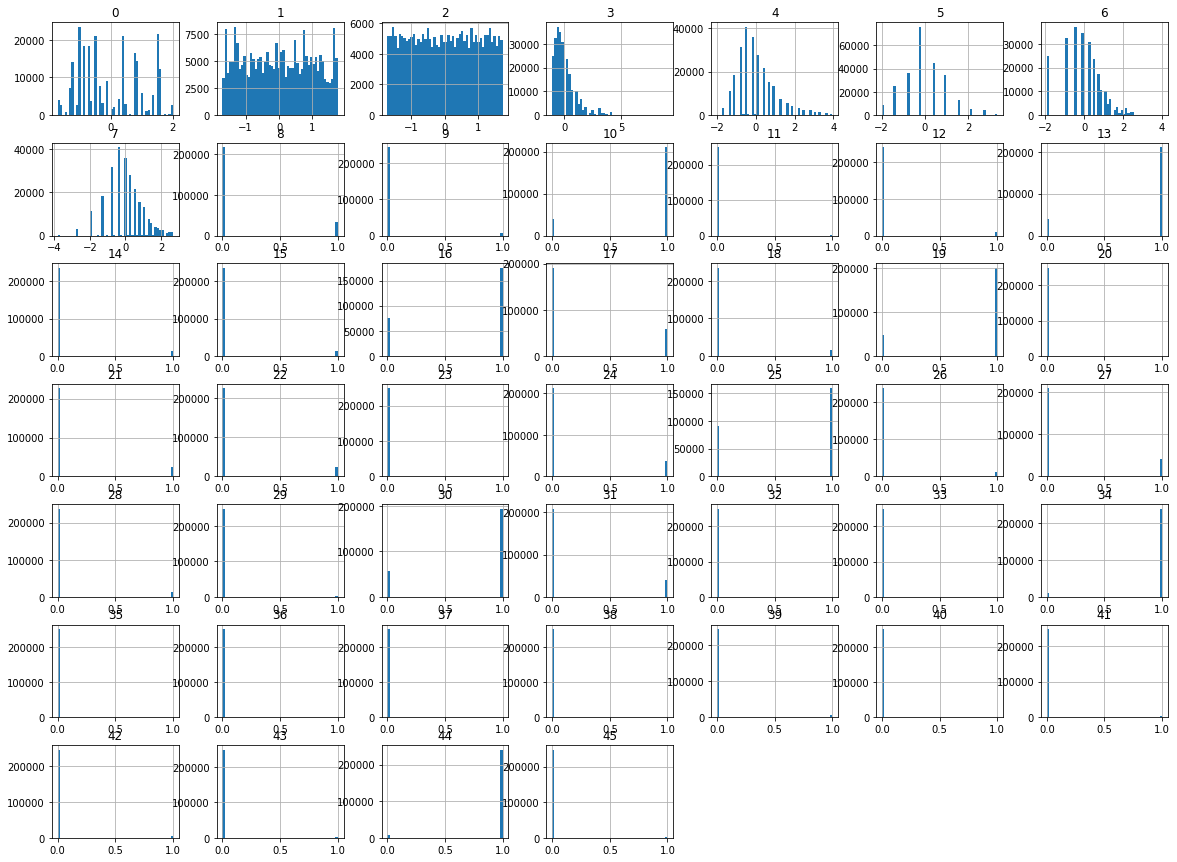

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.DataFrame(NewTransformed).hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
NewTransformed

array([[ 0.2628868 , -1.26980064,  1.37021269, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.8848839 , -1.40056319,  0.16399737, ...,  0.        ,
         1.        ,  0.        ],
       [-1.35430565, -1.2746437 , -0.26450123, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.76048448, -1.18020409,  1.4947571 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.22990623, -0.52639137,  1.32988664, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.506881  ,  0.98948553, -0.57147302, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train_transformed

array([[ 0.2628868 , -1.26980064,  1.37021269, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.8848839 , -1.40056319,  0.16399737, ...,  0.        ,
         1.        ,  0.        ],
       [-1.35430565, -1.2746437 , -0.26450123, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.76048448, -1.18020409,  1.4947571 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.22990623, -0.52639137,  1.32988664, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.506881  ,  0.98948553, -0.57147302, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
## Saving the pipeline processing object as a file
import joblib

joblib.dump(Full_Pipeline,'/content/drive/MyDrive/Modeling Earthquake Damage/Niloofar_XGBoost_ML/FullDataProcessing_Pipeline.pkl')

## to do preprocessing on test and validation set, we would use the same object pipeline_full and use transform method on those sets


['/content/drive/MyDrive/Modeling Earthquake Damage/Niloofar_XGBoost_ML/FullDataProcessing_Pipeline.pkl']

In [ ]:
X_train_transformed

# Validation and test transformation

In [ ]:
#Validation and test data transformation
predictors_Test = [col for col in test_Holdout_set.columns if col not in [target]]
X_test_noTrans = test_Holdout_set[predictors_Test]
Y_test= test_Holdout_set[target]


predictors_val = [col for col in Validation_set.columns if col not in [target]]
X_val_noTrans = Validation_set[predictors]
Y_val= Validation_set[target]

In [ ]:
## transform valodation data

X_test=Full_Pipeline.transform(X_test_noTrans)
X_val=Full_Pipeline.transform(X_val_noTrans)

# Select and Train an XGBoost Model

In [ ]:
# Models to be saved in different file

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()

  
def fitXgb(sk_model, training_data=X_train_transformed,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy test set: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost Precision test set: '+str(precision_score(sk_model.predict(training_data['X_test']), training_data['Y_test'],average='micro')))
    print('XGBoost Recall test set: '+str(recall_score(sk_model.predict(training_data['X_test']), training_data['Y_test'],average='micro')))
    print('XGBoost F1-Score (Micro) test set: '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    print('XGBoost Precision validation set: '+str(precision_score(sk_model.predict(training_data['X_val']), training_data['Y_val'],average='micro')))
    print('XGBoost Recall validation set: '+str(recall_score(sk_model.predict(training_data['X_val']), training_data['Y_val'],average='micro')))
    print('XGBoost Accuracy validation: '+str(accuracy_score(sk_model.predict(training_data['X_val']), training_data['Y_val'])))
    print('XGBoost F1-Score (Micro) validation: '+str(f1_score(sk_model.predict(training_data['X_val']),training_data['Y_val'],average='micro')))
    plot_compare(metrics,store,epochs)
    return sk_model

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
#Final model tuning is done in rev 2 file of this folder
xgb_Final = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    reg_alpha=1,
                    seed=27)

In [ ]:
training_data = {'X_train':X_train_transformed,'Y_train':y_train.values,
                'X_val': X_val,'Y_val':Y_val.values,
                'X_test': X_test,'Y_test':Y_test.values}


ml1=fitXgb(xgb_Final,training_data,epochs=500 )

In [ ]:

xgb1_1 = XGBClassifier(learning_rate=0.2,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.06945	val-merror:0.49382	train-mlogloss:1.06921	train-merror:0.492603
[100]	val-mlogloss:0.942729	val-merror:0.453402	train-mlogloss:0.928626	train-merror:0.444305
[200]	val-mlogloss:0.929302	val-merror:0.441826	train-mlogloss:0.904625	train-merror:0.427553
[300]	val-mlogloss:0.922131	val-merror:0.436853	train-mlogloss:0.887655	train-merror:0.416333
[399]	val-mlogloss:0.917827	val-merror:0.432872	train-mlogloss:0.874564	train-merror:0.408167
-- Model Report --
XGBoost Accuracy test set: 0.5748985523930124
XGBoost Precision test set: 0.5748985523930124
XGBoost Recall test set: 0.5748985523930124
XGBoost F1-Score (Micro) test set: 0.5748985523930124
XGBoost Precision validation set: 0.5692701255096331
XGBoost Recall validation set: 0.5692701255096331
XGBoost Accuracy validation: 0.5692701255096331
XGBoost F1-Score (Micro) validation: 0.5692701255096331


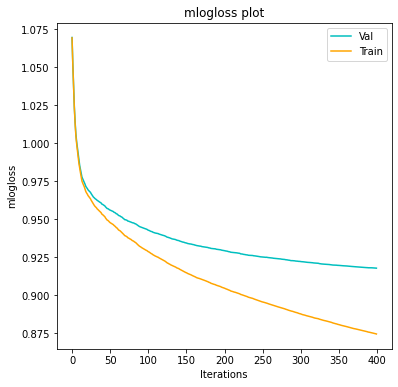

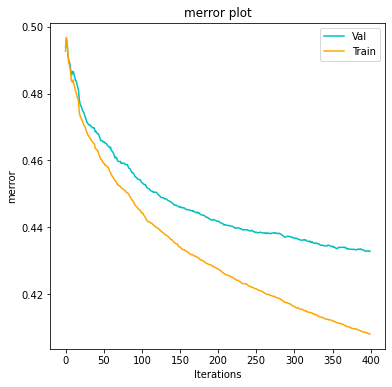

In [ ]:
BestML=fitXgb(xgb1_1,training_data,epochs=400 )

Fitting model...
Fitting done!
[0]	val-mlogloss:1.06945	val-merror:0.49382	train-mlogloss:1.06921	train-merror:0.492603
[100]	val-mlogloss:0.943238	val-merror:0.454409	train-mlogloss:0.929022	train-merror:0.444425
[200]	val-mlogloss:0.929337	val-merror:0.442481	train-mlogloss:0.904299	train-merror:0.427897
[300]	val-mlogloss:0.921838	val-merror:0.437429	train-mlogloss:0.887151	train-merror:0.416277
[400]	val-mlogloss:0.91813	val-merror:0.435399	train-mlogloss:0.874736	train-merror:0.408683
[499]	val-mlogloss:0.915563	val-merror:0.433576	train-mlogloss:0.863897	train-merror:0.402091
-- Model Report --
XGBoost Accuracy test set: 0.5734883587072265
XGBoost Precision test set: 0.5734883587072265
XGBoost Recall test set: 0.5734883587072265
XGBoost F1-Score (Micro) test set: 0.5734883587072265
XGBoost Precision validation set: 0.569637860740267
XGBoost Recall validation set: 0.569637860740267
XGBoost Accuracy validation: 0.569637860740267
XGBoost F1-Score (Micro) validation: 0.56963786074026

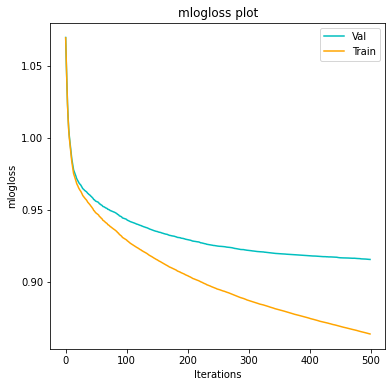

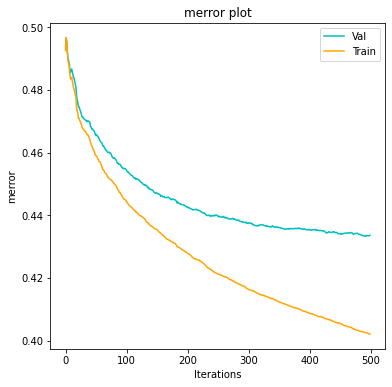

In [ ]:
xgb1_12 = XGBClassifier(learning_rate=0.2,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    reg_alpha=0.01,
                    num_class=3,
                    seed=27)


bestML2=fitXgb(xgb1_12,training_data,epochs=500 )

In [ ]:
valpredictions=BestML.predict(X_val)
testpredictions=BestML.predict(X_test)

In [ ]:
from sklearn.metrics import precision_recall_curve,auc,roc_curve, f1_score,precision_score, recall_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

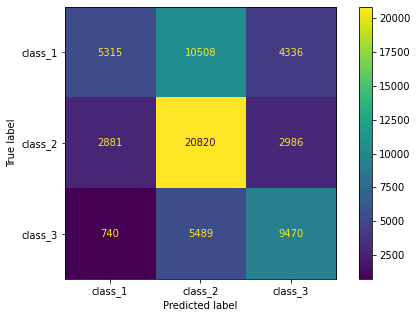

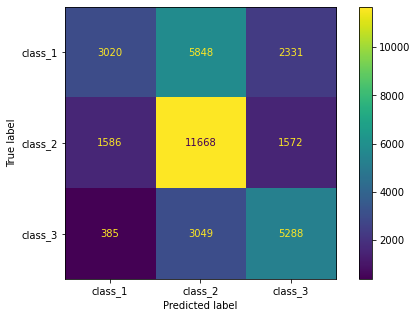

()

In [ ]:

def Confusionplot(y_test, y_pred):
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred),
        display_labels=["class_1", "class_2", "class_3"],
    )

    cmp.plot(ax=ax)
    plt.show()

    return()

Confusionplot(Y_val.values,valpredictions)
Confusionplot(Y_test.values,testpredictions)


In [ ]:
print(classification_report(Y_test.values,testpredictions, digits=3))

              precision    recall  f1-score   support

           0      0.605     0.270     0.373     11199
           1      0.567     0.787     0.659     14826
           2      0.575     0.606     0.590      8722

    accuracy                          0.575     34747
   macro avg      0.583     0.554     0.541     34747
weighted avg      0.582     0.575     0.550     34747



In [ ]:
df_classification_report = pd.DataFrame(classification_report(Y_test.values,testpredictions, digits=3,output_dict=True)).transpose()
print(df_classification_report)

              precision    recall  f1-score       support
0              0.605089  0.269667  0.373070  11199.000000
1              0.567372  0.786996  0.659377  14826.000000
2              0.575345  0.606283  0.590409   8722.000000
accuracy       0.574899  0.574899  0.574899      0.574899
macro avg      0.582602  0.554315  0.540952  34747.000000
weighted avg   0.581530  0.574899  0.549788  34747.000000


In [ ]:
df_classification_report.to_csv('/content/drive/MyDrive/Modeling Earthquake Damage/Niloofar_XGBoost_ML/Report.csv')

In [ ]:
(#Final model tuning was done locally with grid search due to computational power issues
## adding regularization in hope to reduce overfitting
xgb_2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=3,
                    reg_alpha=1,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.08785	val-merror:0.503701	train-mlogloss:1.08777	train-merror:0.505502
[100]	val-mlogloss:0.971739	val-merror:0.480118	train-mlogloss:0.96935	train-merror:0.478769
[200]	val-mlogloss:0.962145	val-merror:0.472044	train-mlogloss:0.957466	train-merror:0.467525
[300]	val-mlogloss:0.956015	val-merror:0.465185	train-mlogloss:0.949921	train-merror:0.460634
[400]	val-mlogloss:0.951355	val-merror:0.460836	train-mlogloss:0.943977	train-merror:0.455993
[449]	val-mlogloss:0.949282	val-merror:0.459413	train-mlogloss:0.941377	train-merror:0.453883
-- Model Report --
XGBoost Accuracy test set: 0.5570552853483755
XGBoost Precision test set: 0.5570552853483755
XGBoost Recall test set: 0.5570552853483755
XGBoost F1-Score (Micro) test set: 0.5570552853483755
XGBoost Precision validation set: 0.5553761291869854
XGBoost Recall validation set: 0.5553761291869854
XGBoost Accuracy validation: 0.5553761291869854
XGBoost F1-Score (Micro) validation: 0.5553761291

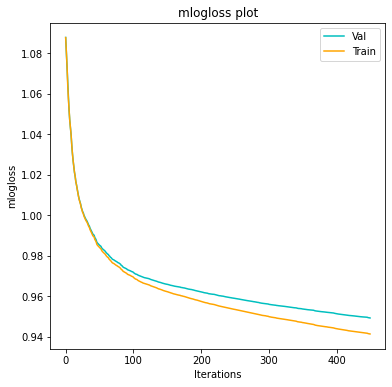

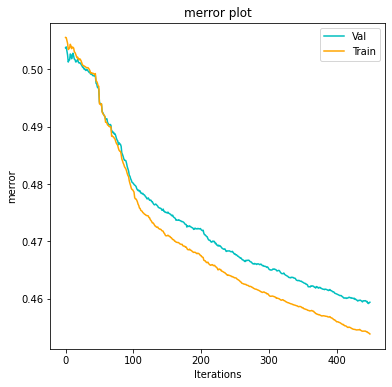

In [ ]:
ML2=fitXgb(xgb_2,training_data,epochs=450 )

In [ ]:
xgb1_3 = XGBClassifier(learning_rate=0.25,
                    n_estimators=1100,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    reg_alpha=0.1,
                    num_class=3,
                    seed=27)

In [ ]:
ML3=fitXgb(xgb1_3,training_data,epochs=500 )

In [ ]:
# import pickle

# pickl = {'model': xgb_Final}
# pickle.dump(pickl, open('model_file'+'.p','wb'))

In [ ]:
# Create and train tensorlfow model

# TensorflowFlow ML Training


In [ ]:
!sudo pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

from sklearn.metrics import precision_recall_curve,auc,roc_curve, f1_score,precision_score, recall_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU,ReLU, ELU
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau


RANDOM_SEED=42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras import backend as K

In [ ]:

## these functions are defined to give us Fscore metric when training keras model. keras does not have any existing metric objects for fscore and we are forced to use custom functions for such
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_Score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:

def keras_Multiclass(Features,NUM_HIDDEN_LAYERS,NUM_HIDDEN_UNITS,RegRate,tf_drop_rate,Active_alpha):
    tf.keras.backend.clear_session()


    METRICS = [
        # keras.metrics.Accuracy (name='accuracy'),
        tf.keras.metrics.CategoricalAccuracy(name='categoric accuracy'),
        keras.metrics.Precision(name='precision'),

        keras.metrics.Recall(name='recall'),
        f1_Score
    ]

    # create model based on number of layers and hidden units given as parameters
    model = Sequential()
    hiddenUnits = NUM_HIDDEN_UNITS.split("/")
    for i in range(NUM_HIDDEN_LAYERS):

        if i==0:
            model.add(Dense(hiddenUnits[i], kernel_regularizer=keras.regularizers.l2(l=RegRate), input_shape=(Features,)))
            ## adding activation layer
            ## after exploring with relu, leaky rely and elu, elu activation was very slightly better
            # model.add(LeakyReLU(alpha=0.05))
            model.add(ELU(alpha=Active_alpha))
            ## adding drop out layer to avoid overfitting 
            model.add(Dropout(rate=tf_drop_rate))
        else:

            model.add(Dense(hiddenUnits[i], kernel_regularizer=keras.regularizers.l2(l=RegRate)))
            # model.add(LeakyReLU(alpha=0.05))
            model.add(ELU(alpha=Active_alpha))
            model.add(Dropout(rate=tf_drop_rate))

    model.add(Dense(3, activation='softmax'))

    ## early stopping to stop training when ever over fitting was starting to happen
    early_stop = EarlyStopping(monitor="val_f1_Score", mode="min", verbose=1, patience=3, restore_best_weights=True)
    ## this part reduces the learning rate as it reaches closer to global minimum of learning curve
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", mode="min", verbose=1, patience=3, factor=0.2, min_delta=0.001, cooldown=0, min_lr=0)

    callback = [early_stop, reduce_lr]

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

    return model,callback


## custom function to provide us with heat plot of confusion matrix
def Confusionplot(y_test, y_pred):
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred),
        display_labels=["class_1", "class_2", "class_3"],
    )

    cmp.plot(ax=ax)
    plt.show()

    return()

In [ ]:
# define function for training the model with parameters

def train(parameters, x_train,X_val,x_test,y_train,y_test,y_val):

    ####################################
    # Variables loading
    ####################################


    NUM_HIDDEN_LAYERS,NUM_HIDDEN_UNITS,RegRate,tf_drop_rate,Batch_size, Epoch_Num,Active_alpha=parameters
    print(x_train.shape[1])
    inp_dimention=x_train.shape[1]


    ## encoding the labels
    dummy_y = np_utils.to_categorical(y_train)
    dummy_y_val = np_utils.to_categorical(y_val)
    dummy_y_test = np_utils.to_categorical(y_test)
    

    ####################################
    # ML definition and training
    ####################################

    ## define and compile model based on parameters given to function
    estimator,CallBack = keras_Multiclass(inp_dimention,NUM_HIDDEN_LAYERS,NUM_HIDDEN_UNITS,RegRate,tf_drop_rate,Active_alpha)

    ## fitting our model
    hist =estimator.fit(x=x_train, y=dummy_y, epochs=Epoch_Num, validation_data=(X_val,dummy_y_val), callbacks=CallBack,batch_size=Batch_size)


    ####################################
    # Assessing prediction and ml results
    ####################################

    # Validation Results
    # getting prediction probability on each classes in out target labels
    y_pred_probs_val=estimator.predict(X_val)

    # getting the class label from probabilities
    y_pred_val=np.argmax(y_pred_probs_val,axis=1)
    
    print("#### Validation Results ####")
    print(confusion_matrix(y_val, y_pred_val))
    ## Print the precision and recall, among other metrics
    print(classification_report(y_val, y_pred_val, digits=3))
    Confusionplot(y_val, y_pred_val)


    print("#### Test Results ####")
    # getting prediction probability on each classes in out target labels
    y_pred_probs=estimator.predict(x_test)

    # getting the class label from probabilities
    y_pred=np.argmax(y_pred_probs,axis=1)

    ##Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))
    ## Print the precision and recall, among other metrics
    print(classification_report(y_test, y_pred, digits=3))

    ##plot confusion matrix
    Confusionplot(y_test, y_pred)

    ROC_AUC_VAl=roc_auc_score(
        y_test, y_pred_probs, multi_class="ovr", average="weighted"
    )

    print("Roc AUC val")
    print(ROC_AUC_VAl)


    return y_pred_val,y_pred

label !
[1 1 2 ... 1 1 1]
46
Epoch 1/100
3910/3910 [==============================] - 16s 4ms/step - loss: 1.0525 - categoric accuracy: 0.4676 - precision: 0.5697 - recall: 0.1265 - f1_Score: 0.2027 - val_loss: 1.0337 - val_categoric accuracy: 0.4700 - val_precision: 0.5462 - val_recall: 0.1505 - val_f1_Score: 0.2341 - lr: 0.0010
Epoch 2/100
3910/3910 [==============================] - 15s 4ms/step - loss: 1.0279 - categoric accuracy: 0.4742 - precision: 0.5698 - recall: 0.1477 - f1_Score: 0.2313 - val_loss: 1.0270 - val_categoric accuracy: 0.4763 - val_precision: 0.5690 - val_recall: 0.1621 - val_f1_Score: 0.2503 - lr: 0.0010
Epoch 3/100
3910/3910 [==============================] - 15s 4ms/step - loss: 1.0261 - categoric accuracy: 0.4745 - precision: 0.5691 - recall: 0.1555 - f1_Score: 0.2413 - val_loss: 1.0268 - val_categoric accuracy: 0.4777 - val_precision: 0.5499 - val_recall: 0.2023 - val_f1_Score: 0.2941 - lr: 0.0010
Epoch 4/100
3910/3910 [==============================] - 16s 4

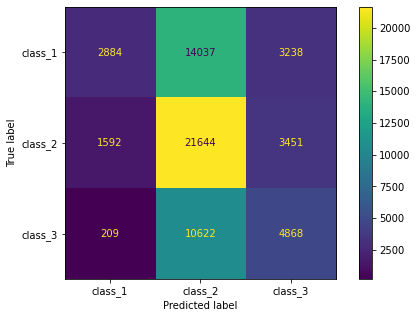

#### Test Results ####
[[ 1604  7869  1726]
 [  889 12080  1857]
 [  109  5869  2744]]
              precision    recall  f1-score   support

           0      0.616     0.143     0.232     11199
           1      0.468     0.815     0.594     14826
           2      0.434     0.315     0.365      8722

    accuracy                          0.473     34747
   macro avg      0.506     0.424     0.397     34747
weighted avg      0.507     0.473     0.420     34747



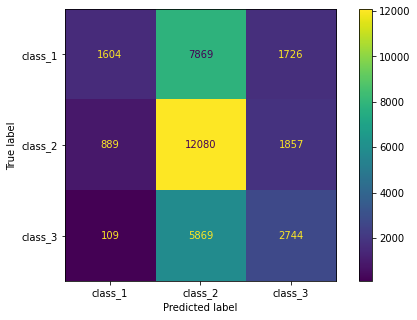

Roc AUC val
0.6163442481044192


In [ ]:
    NUM_HIDDEN_LAYERS= 1
    NUM_HIDDEN_UNITS='200/150/100/50'
    RegRate=0.01
    tf_drop_rate=0.01
    Batch_size=64
    Epoch_Num=100
    Active_alpha=0.1
    print("label !")

    print(Y_test.values)

    parameters=NUM_HIDDEN_LAYERS,NUM_HIDDEN_UNITS,RegRate,tf_drop_rate,Batch_size, Epoch_Num,Active_alpha
    y_pred_val,y_pred=train(parameters, X_train_transformed,X_val,X_test,y_train,Y_test,Y_val)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
## https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/#submission-format 
 
# F1 score for the test set    

# y_pred = grid_search_cv.predict(X_test_transformed)
print(precision_score(Y_val, y_pred_val, average='macro'))
print(f1_score(Y_val, y_pred_val, average='macro'))
print(precision_score(Y_test, y_pred, average='macro'))
print(f1_score(Y_test, y_pred, average='macro'))

0.5014136455116956
0.3941473430847062
0.5060121197234068
0.3971839999892341
